### Sebastián Rodríguez
### Carnet: 20003076


# Proyecto#1: Ciencia de datos en Python

In [1]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt

In [5]:
data = np.load("proyecto_training_data.npy")

datodiv, variable = data.shape
(datodiv, variable)
ent_datodiv = int(datodiv*0.8)
Ytrain = data[:ent_datodiv, 0]
Xtrain = data[:ent_datodiv, 1]
Ytest = data[ent_datodiv:, 0]
Xtest = data[ent_datodiv:, 1]
#data.ndim
#len(data)
#data.itemsize 
#data
data.shape

(1460, 6)

In [6]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(tf.constant(1.), name = "W") 
b = tf.Variable(tf.constant(0.), name = "b") 
lr = tf.placeholder(tf.float32)


In [7]:
Yhat = tf.add(tf.multiply(X, W), b) 
cost = tf.reduce_sum(tf.pow(Yhat-Y, 2)) / (2 * ent_datodiv) 
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
init = tf.global_variables_initializer() 
testSummary = tf.summary.scalar(name='Costo', tensor = cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:

def entrenarModLin(x, y, training_epochs, learning_rate, imp):
    with tf.Session() as sess: 
        writer = tf.summary.FileWriter('./graficas', sess.graph)
        # Initializing the Variables 
        sess.run(init) 
        for epoch in range(training_epochs): 
            for (_x, _y) in zip(x, y): 
                sess.run(optimizer, feed_dict = {X : _x, Y : _y, lr : learning_rate}) 
            if (epoch + 1) % imp == 0: 

                c = sess.run(cost, feed_dict = {X : Xtrain, Y : Ytrain}) 
                print("Epoch", (epoch + 1), ": Costo =", c, "W =", sess.run(W), "b =", sess.run(b)) 
            summary = sess.run(testSummary, feed_dict = {X : x, Y : y})
            writer.add_summary(summary, epoch)
        training_cost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weight = sess.run(W) 
        bias = sess.run(b) 
        return (weight, bias, training_cost)

In [9]:
def graficos(weight, bias, costo):
    predictions = weight * Xtrain + bias 
    print("Costo =", costo, "Pendiente =", weight, "Intercepto =", bias, '\n') 
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(Xtrain, Ytrain, label = 'Valor Ref')
    plt.ylabel("Precio");
    plt.plot(Xtrain, predictions, 'r', label ='Ajuste')  
    plt.legend() 
    plt.show()

# ENTRENAMIENTO

## lr = 0.1

In [10]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=1, imp=10)

Epoch 10 : Costo = 1258214300.0 W = 34750.074 b = -34050.418
Epoch 20 : Costo = 1195145900.0 W = 38613.562 b = -57953.074
Epoch 30 : Costo = 1170240400.0 W = 41018.926 b = -72834.63
Epoch 40 : Costo = 1160300800.0 W = 42516.504 b = -82099.86
Epoch 50 : Costo = 1156270100.0 W = 43448.863 b = -87868.18
Epoch 60 : Costo = 1154597100.0 W = 44029.336 b = -91459.49
Epoch 70 : Costo = 1153879600.0 W = 44390.688 b = -93695.04
Epoch 80 : Costo = 1153558700.0 W = 44615.69 b = -95087.14
Epoch 90 : Costo = 1153407400.0 W = 44755.746 b = -95953.664
Epoch 100 : Costo = 1153332100.0 W = 44842.973 b = -96493.24


Costo = Tensor("truediv_4:0", shape=(), dtype=float32) Pendiente = 44842.973 Intercepto = -96493.24 



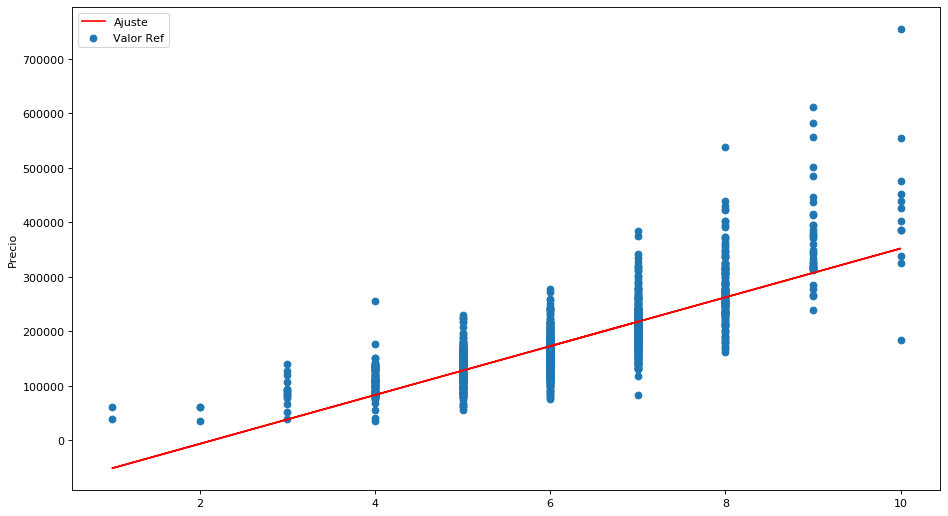

In [62]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.001

In [63]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.001, imp=10)

Epoch 10 : Costo = 9477633000.0 W = 9788.876 b = 1479.1666
Epoch 20 : Costo = 5021543400.0 W = 16347.494 b = 2454.1812
Epoch 30 : Costo = 3021892900.0 W = 20743.13 b = 3091.4978
Epoch 40 : Costo = 2124453400.0 W = 23689.904 b = 3502.629
Epoch 50 : Costo = 1721591000.0 W = 25666.143 b = 3762.2644
Epoch 60 : Costo = 1540637000.0 W = 26992.445 b = 3920.4265
Epoch 70 : Costo = 1459287400.0 W = 27883.234 b = 4010.6387
Epoch 80 : Costo = 1422633200.0 W = 28482.36 b = 4055.3208
Epoch 90 : Costo = 1406041100.0 W = 28886.137 b = 4069.5227
Epoch 100 : Costo = 1398455200.0 W = 29159.107 b = 4063.3013


Costo = Tensor("truediv_4:0", shape=(), dtype=float32) Pendiente = 29159.107 Intercepto = 4063.3013 



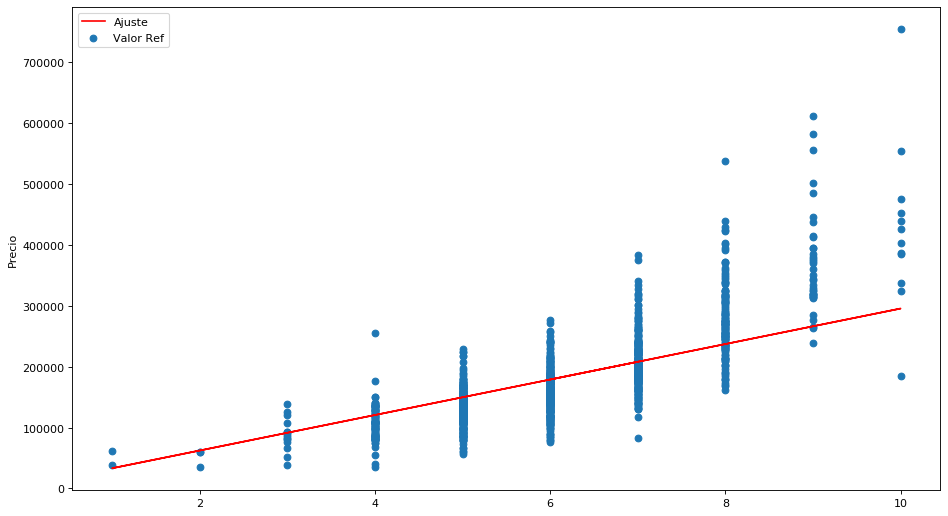

In [64]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.0001

In [66]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.0001, imp=10)

Epoch 10 : Costo = 18021145000.0 W = 1165.4261 b = 176.91632
Epoch 20 : Costo = 16740613000.0 W = 2284.1416 b = 346.69467
Epoch 30 : Costo = 15558708000.0 W = 3358.9338 b = 509.61752
Epoch 40 : Costo = 14467808000.0 W = 4391.5586 b = 665.9522
Epoch 50 : Costo = 13460931000.0 W = 5383.645 b = 815.95337
Epoch 60 : Costo = 12531596000.0 W = 6336.794 b = 959.87994
Epoch 70 : Costo = 11673852000.0 W = 7252.5127 b = 1097.967
Epoch 80 : Costo = 10882158000.0 W = 8132.3003 b = 1230.4393
Epoch 90 : Costo = 10151422000.0 W = 8977.576 b = 1357.5203
Epoch 100 : Costo = 9476968000.0 W = 9789.671 b = 1479.4221


Costo = Tensor("truediv_4:0", shape=(), dtype=float32) Pendiente = 9789.671 Intercepto = 1479.4221 



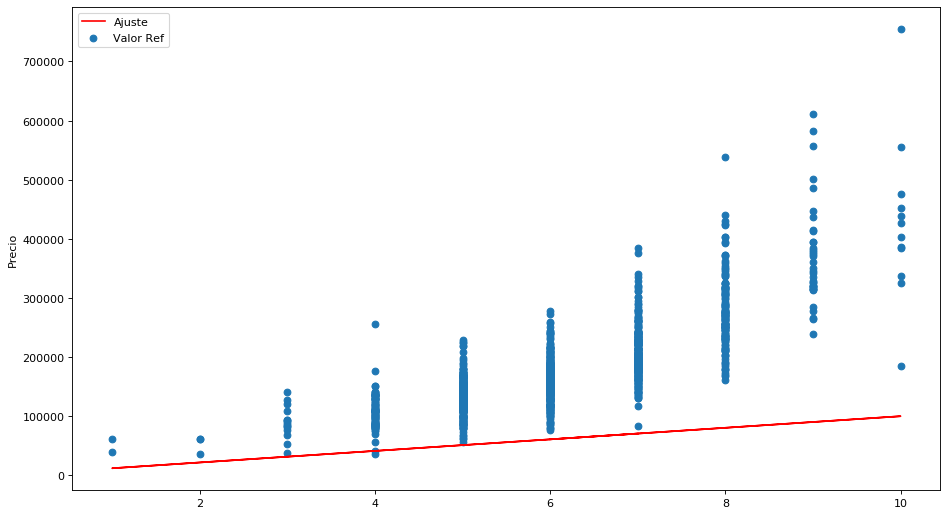

In [67]:
graficos(weight, bias, cost)

# ENTRENAMIENTO

## lr = 0.00001

In [68]:
weight, bias, costo = entrenarModLin(Xtrain, Ytrain, training_epochs=100, learning_rate=0.00001, imp=10)

Epoch 10 : Costo = 19264735000.0 W = 119.553406 b = 18.021257
Epoch 20 : Costo = 19122086000.0 W = 237.6331 b = 35.96849
Epoch 30 : Costo = 18980581000.0 W = 355.23904 b = 53.84212
Epoch 40 : Costo = 18840200000.0 W = 472.3755 b = 71.64235
Epoch 50 : Costo = 18700937000.0 W = 589.0472 b = 89.36962
Epoch 60 : Costo = 18562791000.0 W = 705.24786 b = 107.02392
Epoch 70 : Costo = 18425745000.0 W = 820.9848 b = 124.605675
Epoch 80 : Costo = 18289801000.0 W = 936.25916 b = 142.11578
Epoch 90 : Costo = 18154932000.0 W = 1051.0773 b = 159.55211
Epoch 100 : Costo = 18021132000.0 W = 1165.4387 b = 176.91916


Costo = Tensor("truediv_4:0", shape=(), dtype=float32) Pendiente = 1165.4387 Intercepto = 176.91916 



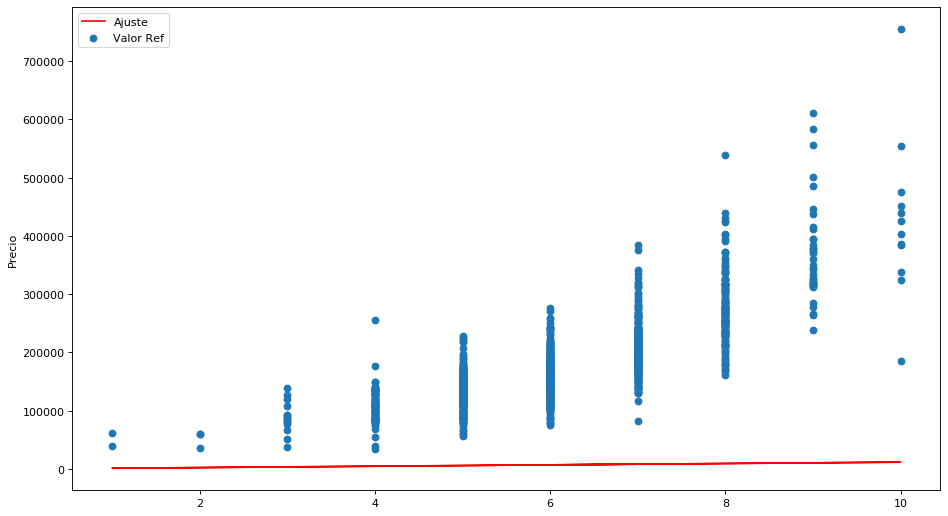

In [69]:
graficos(weight, bias, cost)